# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]:

In [ ]:
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
minfpt = df['food_preparation_time'].min()
avgfpt = df['food_preparation_time'].mean()
maxfpt = df['food_preparation_time'].max()

rounded_avgfpt = round(avgfpt, 2)

print("The minimum time it takes for food to be prepared once an order is placed is", minfpt, "minutes")
print("The average time it takes for food to be prepared once an order is placed is", rounded_avgfpt, "minutes")
print("The maximum time it takes for food to be prepared once an order is placed is", maxfpt, "minutes")

The minimum time it takes for food to be prepared once an order is placed is 20 minutes
The average time it takes for food to be prepared once an order is placed is 27.37 minutes
The maximum time it takes for food to be prepared once an order is placed is 35 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
print("There are", df["rating"].isnull().sum(), "orders not rated.")

There are 736 orders not rated.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()

1200

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


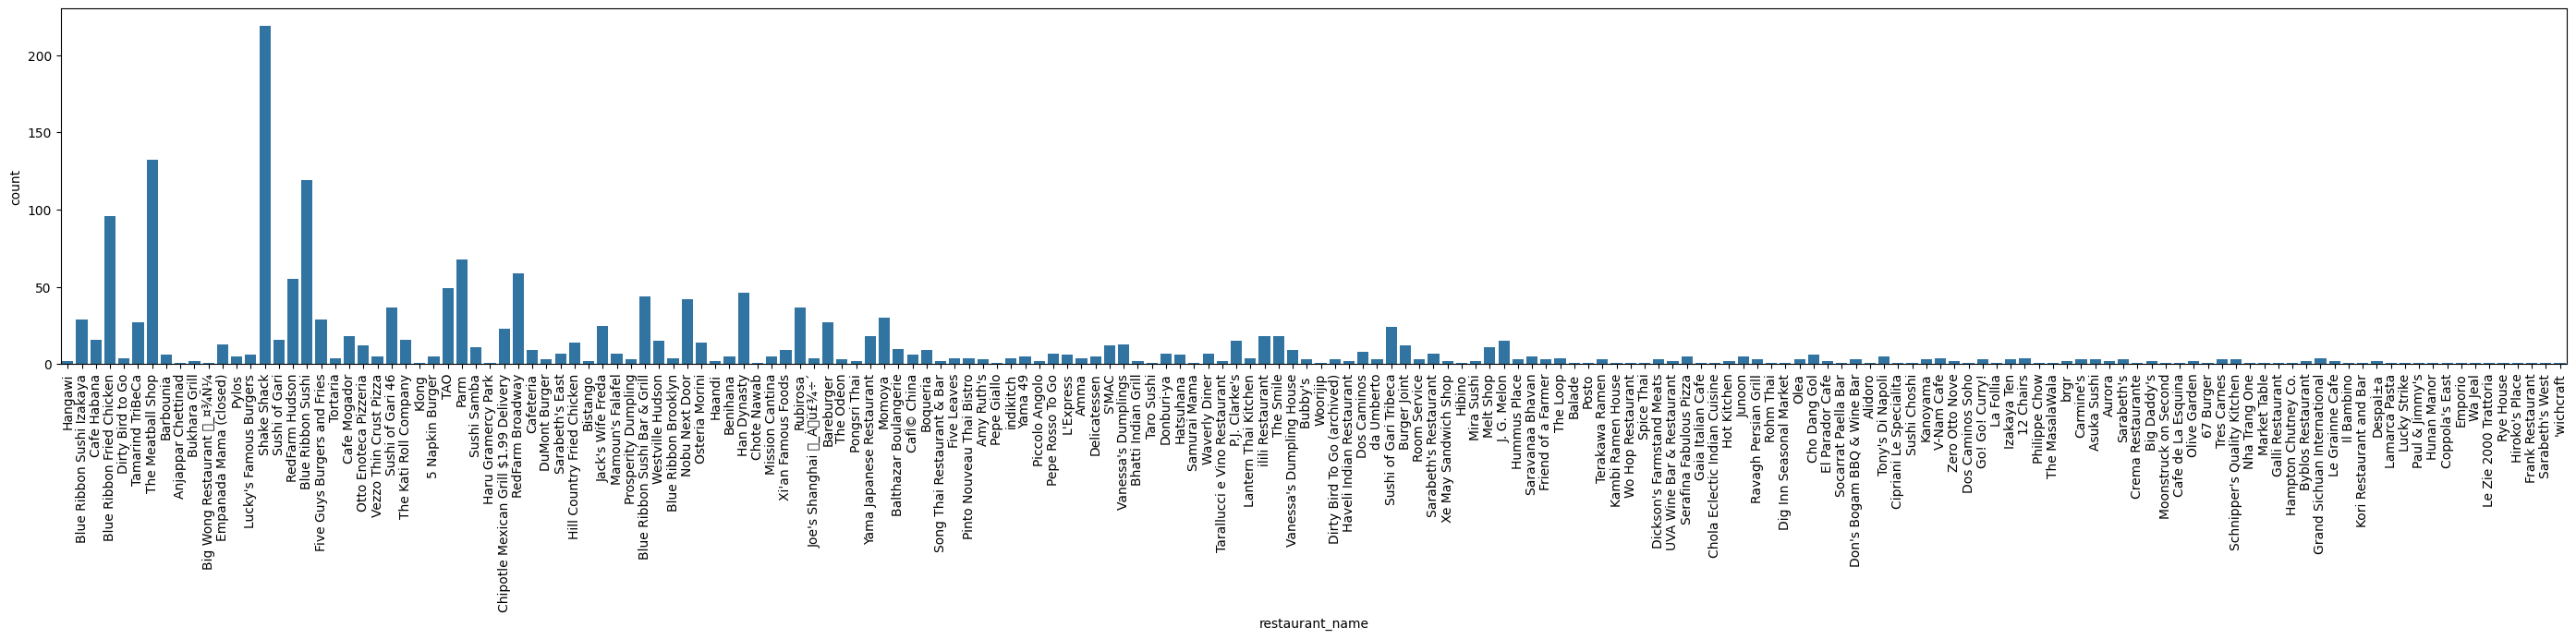

Observation: Shake shack had the most orders.


In [ ]:
plt.figure(figsize=(35, 5))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.show()
print("Observation: Shake shack had the most orders.")

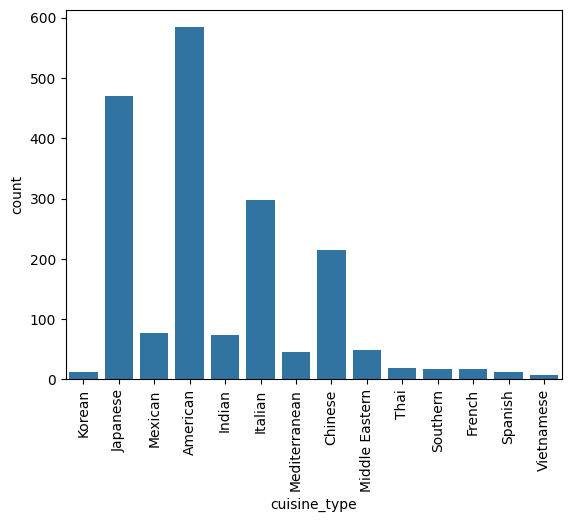

Observation: The most popular cuisine ordered was American.


In [ ]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()
print("Observation: The most popular cuisine ordered was American.")

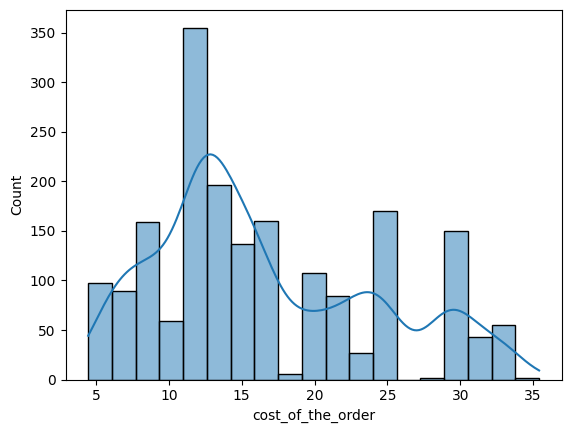

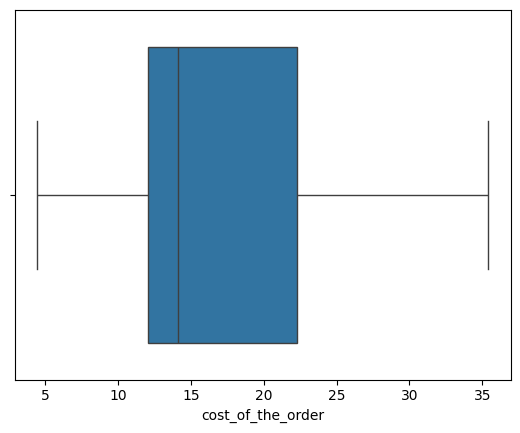

Observation: The cost of the order has a slight right skew with no outliers.


In [ ]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()
print("Observation: The cost of the order has a slight right skew with no outliers.")

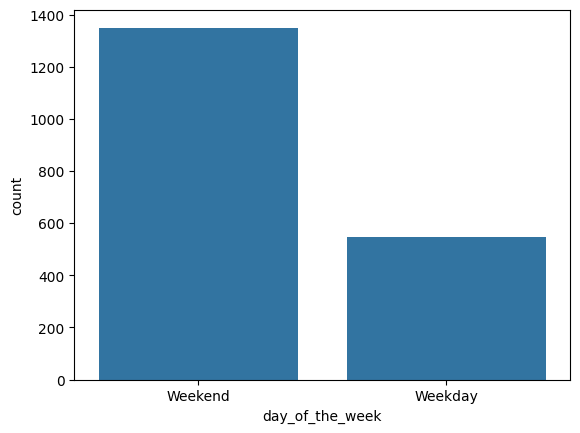

Observation: More orders were placed on weekends than weekdays.


In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()
print("Observation: More orders were placed on weekends than weekdays.")

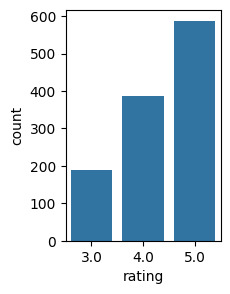

Observation: There were no ratings under a 3, with most ratings being a 5. The order ratings have a left skew.


In [ ]:
plt.figure(figsize=(2, 3))
sns.countplot(data=df, x='rating')
plt.show()
print("Observation: There were no ratings under a 3, with most ratings being a 5. The order ratings have a left skew.")

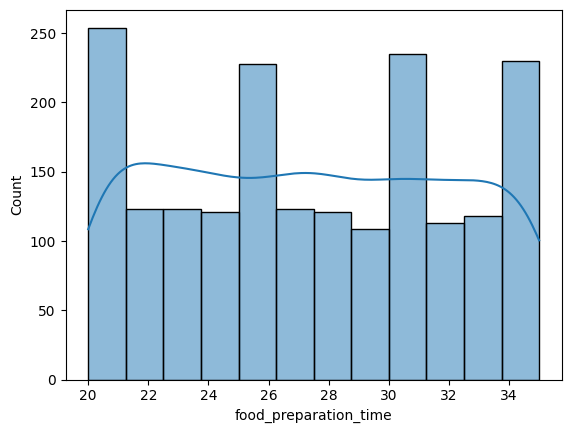

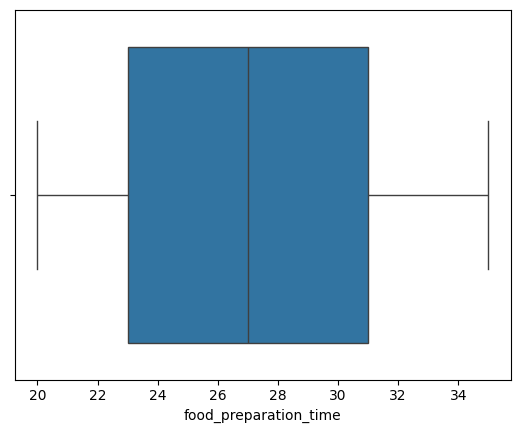

Observation: The food preparation time has a uniform distribution skew with no outliers.


In [ ]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()
print("Observation: The food preparation time has a uniform distribution skew with no outliers.")

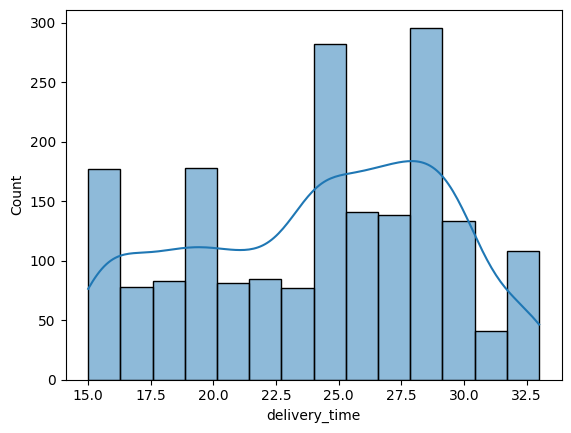

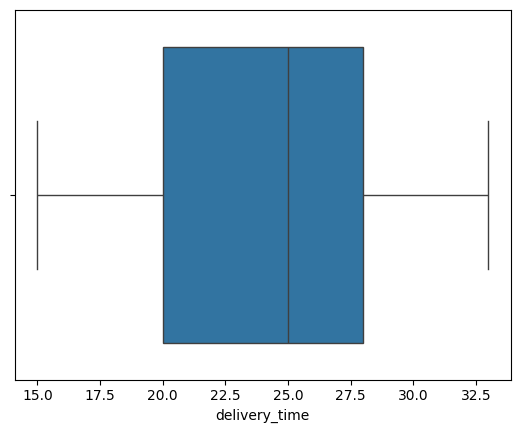

Observation: The delivery time has a slight left skew with no outliers.


In [ ]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()
print("Observation: The delivery time has a slight left skew with no outliers.")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
restaurant_top_5 = df['restaurant_name'].value_counts().head(5)
print(restaurant_top_5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: The most popular restaurants on the weekends are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chickem, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

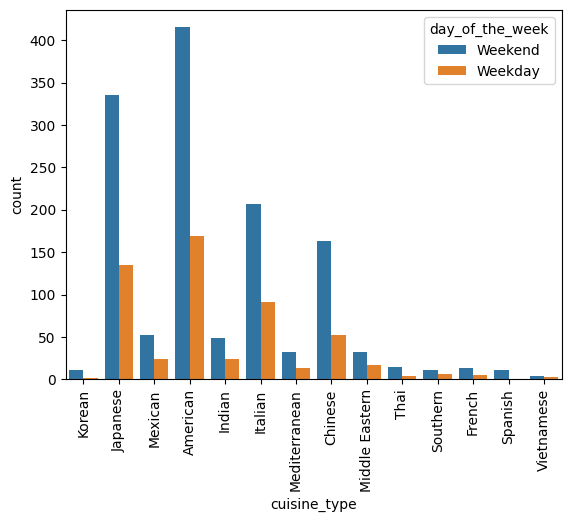

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations: The most popular cuisine on weekends was American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
cost_over_20 = df.loc[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100
rounded_cost_over_20 = round(cost_over_20, 2)
print(rounded_cost_over_20, "% of the orders cost more than 20 dollars.", sep="")

29.24% of the orders cost more than 20 dollars.


#### Observations: 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()
rounded_dt_mean = round(df['delivery_time'].mean(), 2)
print("The mean order delivery time is", rounded_dt_mean, "minutes.")

The mean order delivery time is 24.16 minutes.


#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: Customers with the ID's 52832, 47440, and 83287 will get a 20% discount voucher due to their frequent number of orders placed of 13, 10, and 9, respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


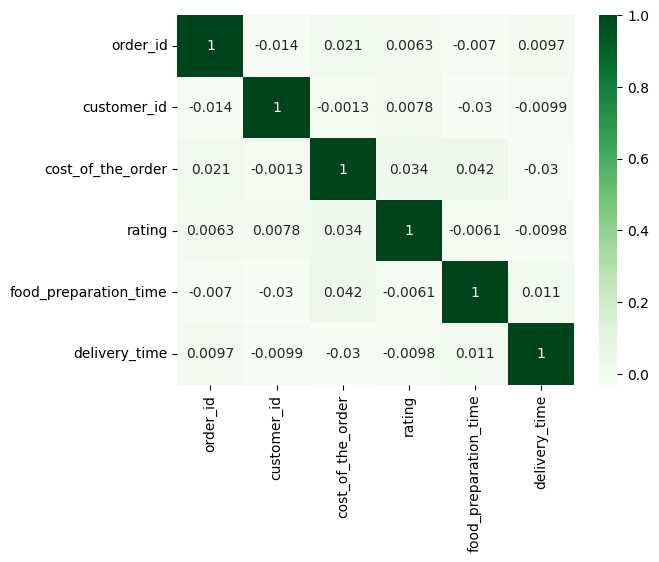

Observation: None of the numeric variables have a strong correlation with each other.


In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.show()
print("Observation: None of the numeric variables have a strong correlation with each other.")

In [ ]:
print("Please click and drag in order to zoom in.")
restaurant_cost_box = px.box(df, x='restaurant_name', y='cost_of_the_order')
restaurant_cost_box.show()

Please click and drag in order to zoom in.


In [ ]:
print("Please click and drag in order to zoom in.")
restaurant_prep_box = px.box(df, x='restaurant_name', y='food_preparation_time')
restaurant_prep_box.show()

Please click and drag in order to zoom in.


In [ ]:
fpt_dt_corr = df[['food_preparation_time', 'delivery_time']].corr()
print(fpt_dt_corr)
print('\n', "There is a no significant correlcation between food prepatation time and delivery time.")

                       food_preparation_time  delivery_time
food_preparation_time               1.000000       0.011094
delivery_time                       0.011094       1.000000

 There is a no significant correlcation between food prepatation time and delivery time.


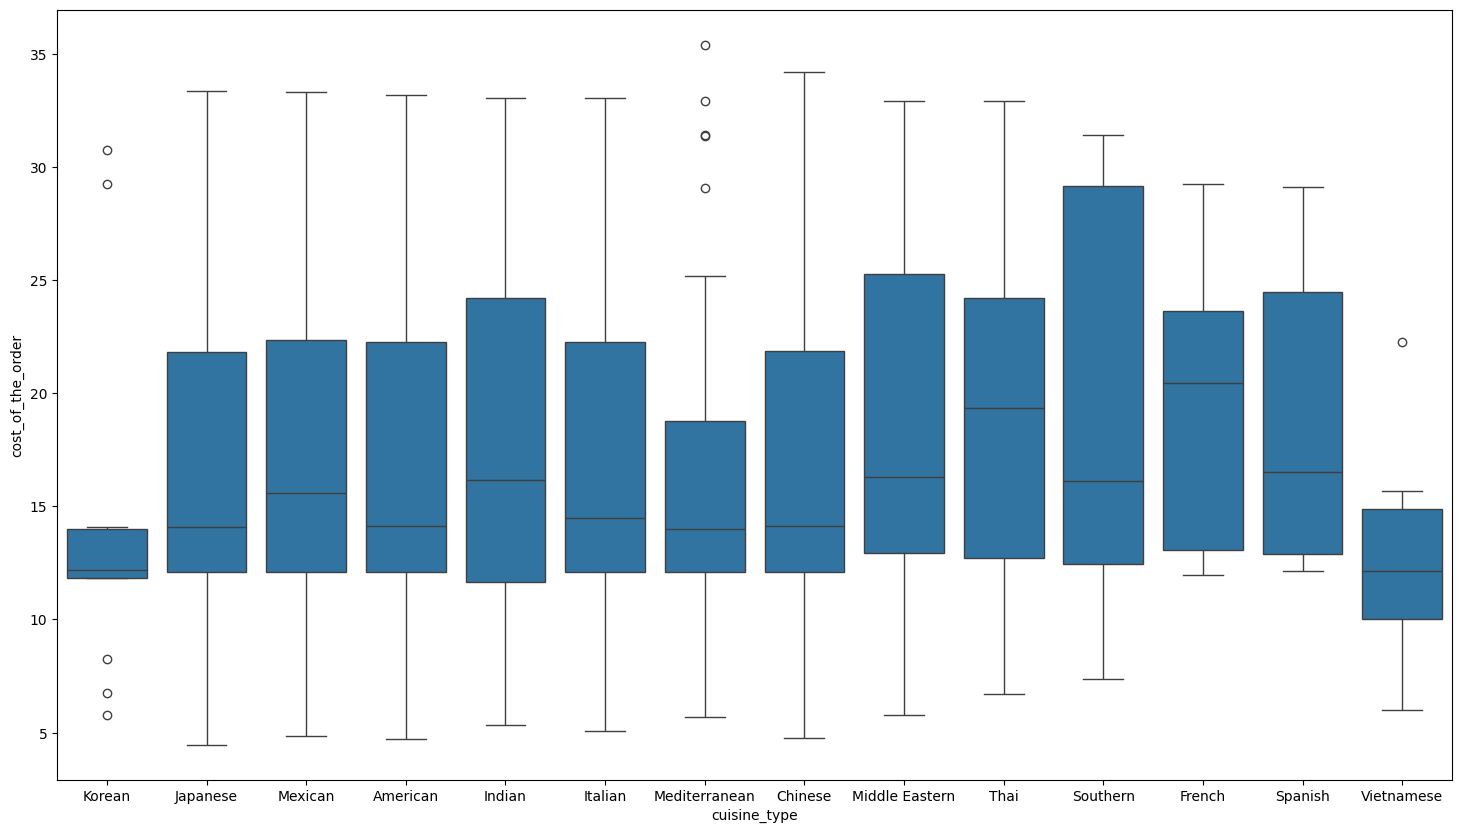

Vienamese and Korean food is typically more affordable.


In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.show()
print("Vienamese and Korean food is typically more affordable.")

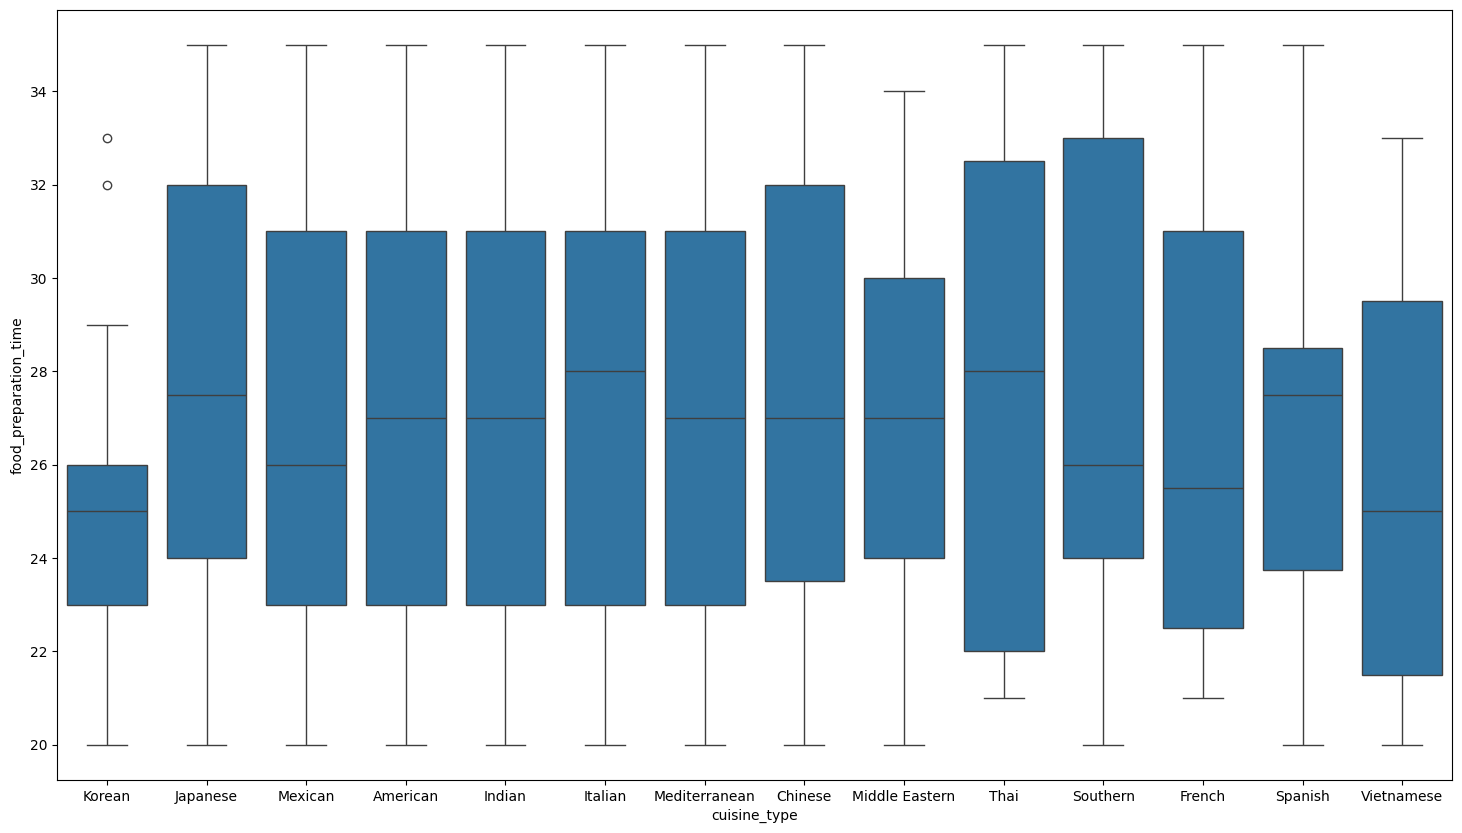

Observation: In general, Korean cuisine is the quickest to prepare.


In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.show()
print("Observation: In general, Korean cuisine is the quickest to prepare.")

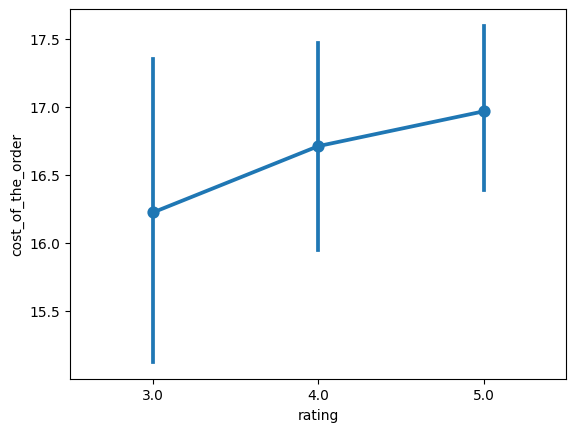

Observation: Orders that cost more typically have higher ratings.


In [ ]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.show()
print("Observation: Orders that cost more typically have higher ratings.")

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


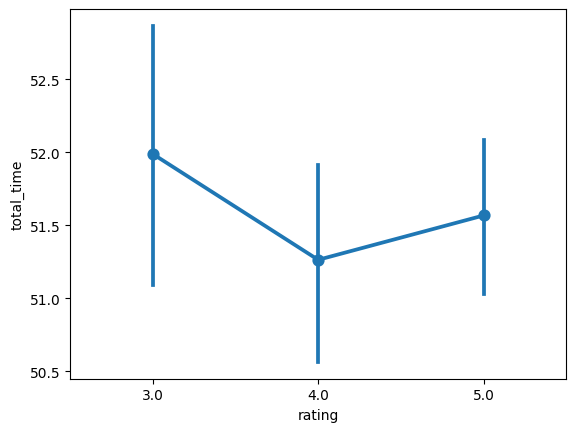

Observation: Orders that take longer to prepare and deliver typically have lower ratings.


In [ ]:
sns.pointplot(data=df, x='rating', y='total_time')
plt.show()
print("Observation: Orders that take longer to prepare and deliver typically have lower ratings.")

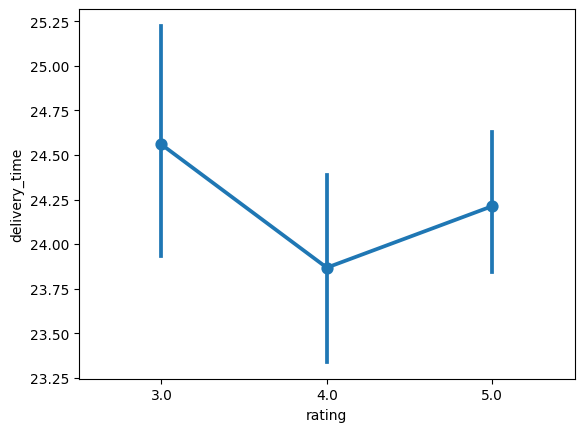

Observation: Orders that take longer to deliver typically have lower ratings.


In [ ]:
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.show()
print("Observation: Orders that take longer to deliver typically have lower ratings.")

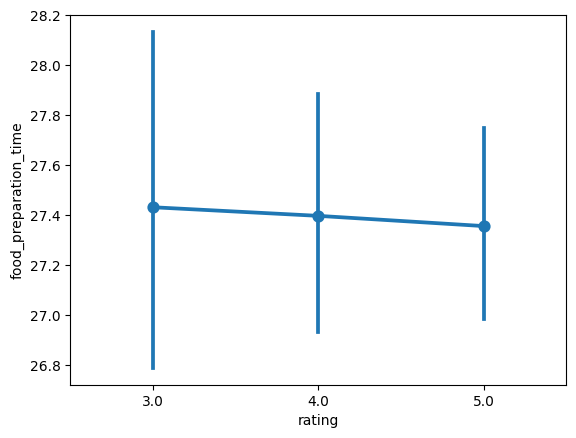

Observation: Food preparation time does not impact rating.


In [ ]:
sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.show()
print("Observation: Food preparation time does not impact rating.")

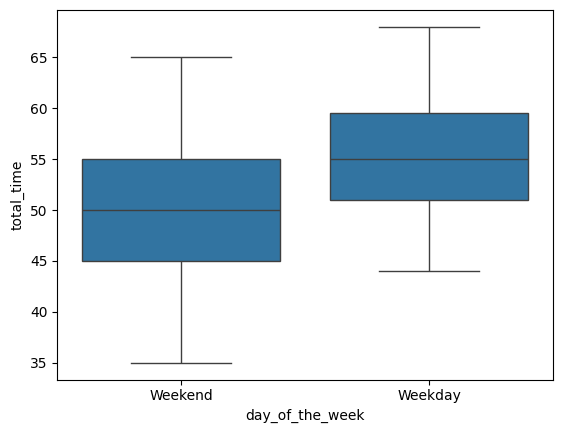

Observation: Orders placed on weekdays typically take longer to prepare and deliver.


In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='total_time')
plt.show()
print("Observation: Orders placed on weekdays typically take longer to prepare and deliver.")

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rating_count = df.groupby('restaurant_name')['rating'].count()
rating_avg = df.groupby('restaurant_name')['rating'].mean()

restaurant_promo = (rating_count > 50) & (rating_avg > 4)
top4_restaurants = restaurant_promo[restaurant_promo].index.tolist()
print("The restaurants that will recieve this promotional offer are: ", top4_restaurants)

The restaurants that will recieve this promotional offer are:  ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop will recieve the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
orders_over_20 = df.loc[df['cost_of_the_order'] > 20]
orders_over_5 = df.loc[df['cost_of_the_order'] > 5]

revenue_20 = orders_over_20['cost_of_the_order'] * 0.25
revenue_5 = orders_over_5['cost_of_the_order'] * 0.15

total_revenue = revenue_20.sum()  + revenue_5.sum()
total_revenue_rounded = round(total_revenue, 2)
print("The net revenue from all orders is $", total_revenue_rounded, sep = "")

The net revenue from all orders is $8379.54


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Total time calculated above

total_over_60 = df.loc[df['total_time'] > 60]
total_over_60_percent = total_over_60.shape[0]/df.shape[0] * 100
rounded_total_over_60_percent = round(total_over_60_percent, 2)
print(rounded_total_over_60_percent, "% of orders take more than 60 minutes to get delivered.", sep="")

10.54% of orders take more than 60 minutes to get delivered.


#### Observations: 10.54% of orders take more than 60 minutes to get delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
delivery_time_weekday = df.loc[df['day_of_the_week'] == 'Weekday', 'delivery_time']
delivery_time_weekend = df.loc[df['day_of_the_week'] == 'Weekend', 'delivery_time']

rounded_delivery_time_weekday = round(delivery_time_weekday.mean(), 2)
rounded_delivery_time_weekend = round(delivery_time_weekend.mean(), 2)

print("The average delivery time during weekdays is", rounded_delivery_time_weekday, "minutes.")
print("The average delivery time during weekends is", rounded_delivery_time_weekend, "minutes.")

The average delivery time during weekdays is 28.34 minutes.
The average delivery time during weekends is 22.47 minutes.


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American, Japanese, Italian, and Chinese cuisines are the most popular cuisines ordered.
*  Customers are more likely to place orders on the weekends.
*  Shake Shack is the most popular restaurant.
*  Orders typically take longer to prepare and deliver on the weekdays.

### Recommendations:

*   Offer weekday promotions, such as discounts for pre-scheduling orders to increase sales during the week and manage the slower preparation and delivery time.
*   Offer a pre-scheduling discount to assist in decreasing preparation and delivery time.
*   When expanding restaurants, focus on American, Japanese, Italian, and Chinese cuisines due to their high demand.



---